IMPORTING DATASETS .....

In [2]:
import numpy as np
import pandas as pd

In [3]:
df1=pd.read_csv('matches.csv')
df1.head()

id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
df2=pd.read_csv('deliveries.csv')
df2.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

ANALYSIS OF DATASET

In [5]:
df1.shape

(756, 18)

In [7]:
df1.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
df2.shape

(179078, 21)

In [10]:
df2.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [11]:
df1.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
df2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

PREPROCESSING 

EXTRACTING RUNS IN SECOND INNINGS OF EACH MATCH FROM THE DELIVERIES.CSV DATASET

In [13]:
runs=df2.groupby(['match_id','inning'])['total_runs'].sum().reset_index()
runs=runs[runs['inning']==2]
#runs

TOTAL SECOND RUNS SCORED ADDED TO MATCHES.CSV 

In [14]:
df1=df1.merge(runs[['match_id','total_runs']],left_on='id',right_on='match_id') 

RENAMING OLD TEAM NAMES WITH THE NEW ONES

In [15]:
df1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
df1['team1']=df1['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df1['team2']=df1['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
df1['team1']=df1['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df1['team2']=df1['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [17]:
df1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

LOOKING FOR ONLY THOSE RECORDS WHERE DL IS NOT PRESENT

In [18]:
df1['dl_applied'].value_counts()

dl_applied
0    735
1     19
Name: count, dtype: int64

In [19]:
df1=df1[df1['dl_applied']==0]
df1

id    Season           city        date                        team1  \
0        1  IPL-2017      Hyderabad  05-04-2017          Sunrisers Hyderabad   
1        2  IPL-2017           Pune  06-04-2017               Mumbai Indians   
2        3  IPL-2017         Rajkot  07-04-2017                Gujarat Lions   
3        4  IPL-2017         Indore  08-04-2017       Rising Pune Supergiant   
4        5  IPL-2017      Bangalore  08-04-2017  Royal Challengers Bangalore   
..     ...       ...            ...         ...                          ...   
749  11347  IPL-2019         Mumbai  05-05-2019        Kolkata Knight Riders   
750  11412  IPL-2019        Chennai  07-05-2019          Chennai Super Kings   
751  11413  IPL-2019  Visakhapatnam  08-05-2019          Sunrisers Hyderabad   
752  11414  IPL-2019  Visakhapatnam  10-05-2019               Delhi Capitals   
753  11415  IPL-2019      Hyderabad  12-05-2019               Mumbai Indians   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
3                Kings XI Punjab              Kings XI Punjab         field   
4                 Delhi Capitals  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
749               Mumbai Indians               Mumbai Indians         field   
750               Mumbai Indians          Chennai Super Kings           bat   
751               Delhi Capitals               Delhi Capitals         field   
752          Chennai Super Kings          Chennai Super Kings         field   
753          Chennai Super Kings               Mumbai Indians           bat   

     result  dl_applied                       winner  win_by_runs  \
0    normal           0          Sunrisers Hyderabad           35   
1    normal           0       Rising Pune Supergiant            0   
2    normal           0        Kolkata Knight Riders            0   
3    normal           0              Kings XI Punjab            0   
4    normal           0  Royal Challengers Bangalore           15   
..      ...         ...                          ...          ...   
749  normal           0               Mumbai Indians            0   
750  normal           0               Mumbai Indians            0   
751  normal           0               Delhi Capitals            0   
752  normal           0          Chennai Super Kings            0   
753  normal           0               Mumbai Indians            1   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
1                 7       SPD Smith   
2                10         CA Lynn   
3                 6      GJ Maxwell   
4                 0       KM Jadhav   
..              ...             ...   
749               9       HH Pandya   
750               6        AS Yadav   
751               2         RR Pant   
752               6    F du Plessis   
753               0       JJ Bumrah   

                                         venue         umpire1  \
0    Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1      Maharashtra Cricket Association Stadium  A Nand Kishore   
2       Saurashtra Cricket Association Stadium     Nitin Menon   
3                       Holkar Cricket Stadium    AK Chaudhary   
4                        M Chinnaswamy Stadium             NaN   
..                                         ...             ...   
749                           Wankhede Stadium   Nanda Kishore   
750                  M. A. Chidambaram Stadium     Nigel Llong   
751                           ACA-VDCA Stadium             NaN   
752                           ACA-VDCA Stadium   Sundaram Ravi   
753         Rajiv Gandhi Intl. Cricket Stadium     Nitin Menon   

       

In [20]:
df1=df1[['match_id','city','winner','total_runs']]

In [21]:
delivery_df=df1.merge(df2,on='match_id')

FEATURE SELECTION 

In [22]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [23]:
delivery_df['total_runs_y']=delivery_df['total_runs_y'].astype(int)
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [24]:
#delivery_df

In [25]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']
#delivery_df

In [26]:
delivery_df['balls_left']=126-(delivery_df['over']*6 + delivery_df['ball'])
#delivery_df

In [27]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
#delivery_df.head()

In [28]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [29]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


In [30]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [31]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [32]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [39]:
final_df = final_df.sample(final_df.shape[0])

In [40]:
final_df.sample()


batting_team     bowling_team        city  runs_left  \
68406  Royal Challengers Bangalore  Kings XI Punjab  Dharamsala        117   

       balls_left  wickets  total_runs_x  crr  rrr  result  
68406         108        9           121  2.0  6.5       0

In [41]:
final_df.dropna(inplace=True)

In [42]:
final_df = final_df[final_df['balls_left'] != 0]

TRAIN TEST SPLIT & MODEL TRAINING

In [74]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [75]:
#X_train

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

ENSEMBLE MODEL

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB

NAIVE BAYES

In [47]:
nb_pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',GaussianNB())
])

In [48]:
nb_pipe.fit(X_train,y_train)

C:\Users\Bhanu Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', GaussianNB())])

In [49]:
y_nb=nb_pipe.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score,precision_score,r2_score,f1_score,recall_score
print(accuracy_score(y_test,y_nb),precision_score(y_test,y_nb),r2_score(y_test,y_nb),f1_score(y_test,y_nb),recall_score(y_test,y_nb))

0.5544141729938961 0.7434473181739282 -0.7884032472395102 0.3640304279461136 0.24102419808666292


LOGISTIC REGRESSION

In [51]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression())
])

In [52]:
pipe.fit(X_train,y_train)

C:\Users\Bhanu Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Bhanu Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression())])

In [53]:
y_pred = pipe.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7204704481167188

In [55]:
pipe.predict_proba(X_test)[10]

array([0.62390029, 0.37609971])

RANDOM FOREST CLASSIFIER

In [79]:
random_forest_pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [80]:
random_forest_pipe.fit(X_train,y_train)

C:\Users\Bhanu Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [81]:
y_p=random_forest_pipe.predict(X_test)

In [82]:
accuracy_score(y_test,y_p)

0.9989281886387996

In [86]:
print(confusion_matrix(y_test,y_p))

[[3953    2]
 [   7 4435]]


In [85]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3955
           1       1.00      1.00      1.00      4442

    accuracy                           1.00      8397
   macro avg       1.00      1.00      1.00      8397
weighted avg       1.00      1.00      1.00      8397



In [60]:
random_forest_pipe.predict_proba(X_test)[6]

array([0.01, 0.99])

DECISION TREE CLASSIFIER

In [61]:
decision_pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',DecisionTreeClassifier())
])

In [62]:
decision_pipe.fit(X_train,y_train)

C:\Users\Bhanu Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', DecisionTreeClassifier())])

In [63]:
yd_p=decision_pipe.predict(X_test)

In [64]:
accuracy_score(y_test,yd_p)

0.9765371445585826

KNN 

In [65]:
knn_pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',KNeighborsClassifier(n_neighbors=5))
])

In [66]:
knn_pipe.fit(X_train,y_train)

C:\Users\Bhanu Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', KNeighborsClassifier())])

In [67]:
yk_p=knn_pipe.predict(X_test)

In [68]:
accuracy_score(yk_p,y_test)

0.8144111954741701

In [69]:
print("Accuracy of Logistic Regression - ",accuracy_score(y_test,y_pred))
print("Accuracy of Decision Tree Classifier - ",accuracy_score(y_test,yd_p))
print("Accuracy of Random Forest Classifier - ",accuracy_score(y_test,y_p))
print("Accuracy of KNN Classifier - ",accuracy_score(yk_p,y_test))

Accuracy of Logistic Regression -  0.7204704481167188
Accuracy of Decision Tree Classifier -  0.9765371445585826
Accuracy of Random Forest Classifier -  0.997945511389013
Accuracy of KNN Classifier -  0.8144111954741701


FUNCTIONS

In [70]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [71]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [88]:
temp_df,target = match_progression(delivery_df,,pipe)
temp_df

Target- 159


end_of_over  runs_after_over  wickets_in_over  lose   win
2247            1                6                0  30.6  69.4
2253            2               15                0  28.5  71.5
2259            3                7                0  24.4  75.6
2265            4               11                1  36.3  63.7
2271            5                3                1  48.1  51.9
2277            6               19                0  45.8  54.2
2283            7                3                0  39.7  60.3
2289            8                9                0  35.1  64.9
2295            9                3                0  30.0  70.0
2301           10                9                1  42.4  57.6
2307           11                5                0  37.3  62.7
2313           12                7                0  32.7  67.3
2319           13               10                0  28.4  71.6
2326           14                5                1  40.6  59.4
2332           15                9                0  35.7  64.3
2338           16               13                0  29.2  70.8
2344           17               15                0  20.2  79.8
2350           18                6                2  41.9  58.1

PLOTS

Text(0.5, 1.0, 'Target-159')

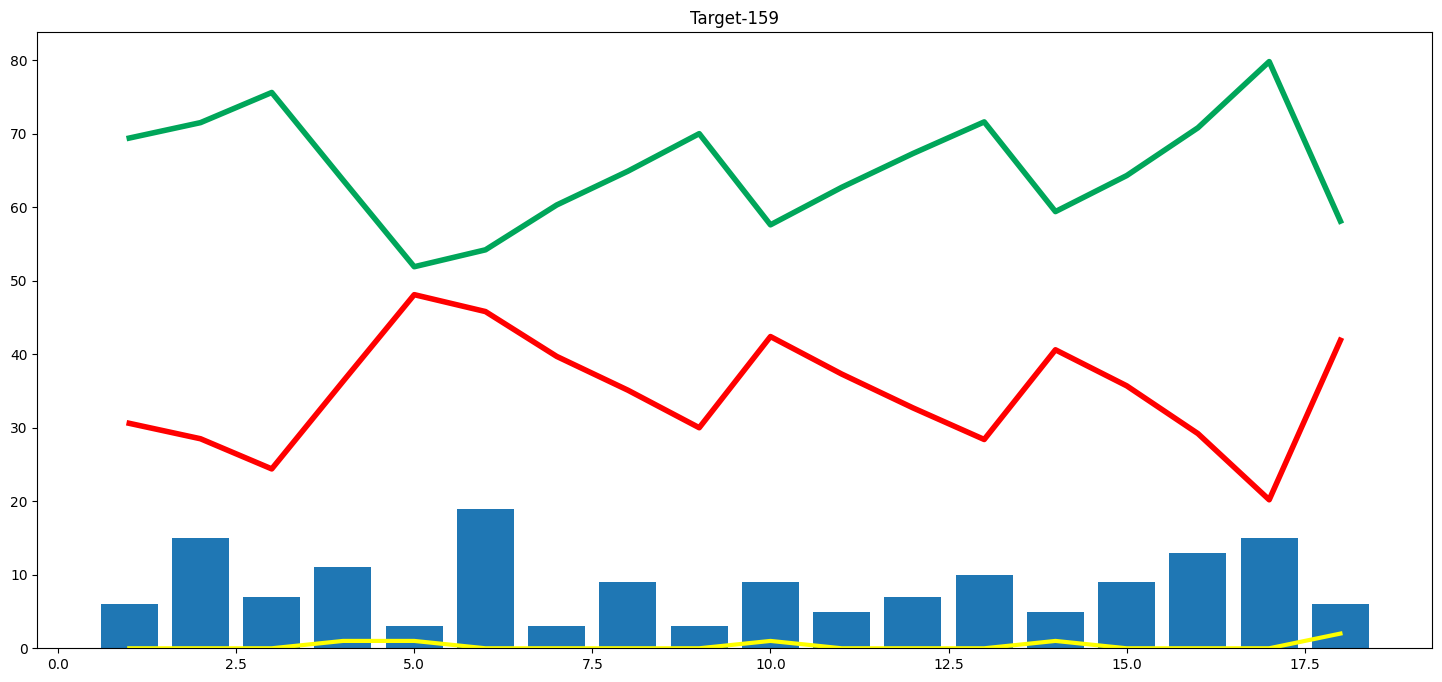

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
import pickle 
pickle.dump(random_forest_pipe,open("pipe.pkl","wp"))